In [ ]:
# Time series forecasting model using Prophet

In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [21]:
# Import and read the walmart.csv file
application_df = pd.read_csv("walmart.csv")


In [22]:
# Preprocess the dataset for Prophet
prophet_df = application_df[['Date', 'Weekly_Sales']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

In [23]:
# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:271: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75sal3vg/lau9lsdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75sal3vg/nb6h06ub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.

In [24]:
# Create DataFrame for future dates
future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days) into the future

# Make predictions
forecast = model.predict(future_dates)

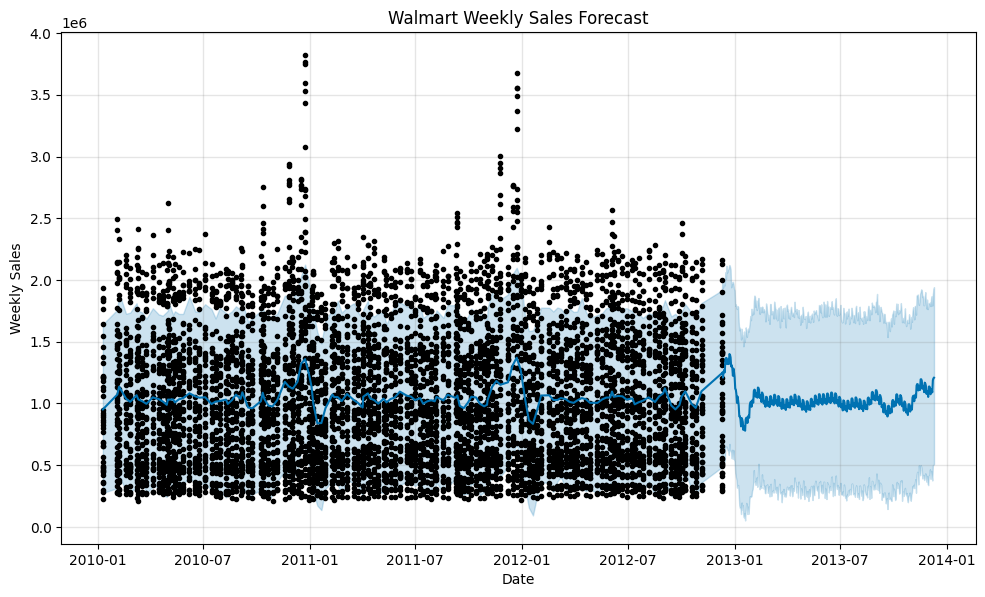

In [25]:
# Visualize the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Walmart Weekly Sales Forecast')
plt.show()

In [ ]:
#Forecasted values (blue line) extend into the future based on the model's predictions, and the historical data points (black dots) show the actual sales that occurred in the past.